This short notebook illustrates what happens when you participate in a series of tournaments using a bracket system. Specifically, it covers:
- The probability of winning a single tournament
- The expected number of tournaments needed to win once
- The number of tournaments you are likely to lose before winning one

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Initial conditions:
- **n_players** - number of players in a single tournament
- **n_games** - number of tournaments in the series
- **p_base** - probability of winning a single peer-to-peer match

In [2]:
n_players = 32
n_games = 30
p_base = np.array([0.3, 0.5, 0.8, 0.9])

Let's assume that:
- p = 0.3 - low-skill player
- p = 0.5 - middle-skill player
- p = 0.8 - good-skill player
- p = 0.9 - high-skill player

- Playing under a bracket system means that to win a tournament, you need to progress from the top-32 to the final (top-2), which essentially requires $log_{2}^{N}$ steps. Assuming that each round (match) is independent and has the same probability of winning, the probability of winning the entire tournament is $p_{}^{log_{2}^{N}}$
- Assuming the tournaments are independent, the number of wins in the series follows a binomial distribution, with the expected number of wins equal to $np$, where $p$ is the probability of winning a single tournament and $n$ is the number of tournaments.

[0.00243 0.03125 0.32768 0.59049]
[ 0.0729  0.9375  9.8304 17.7147]


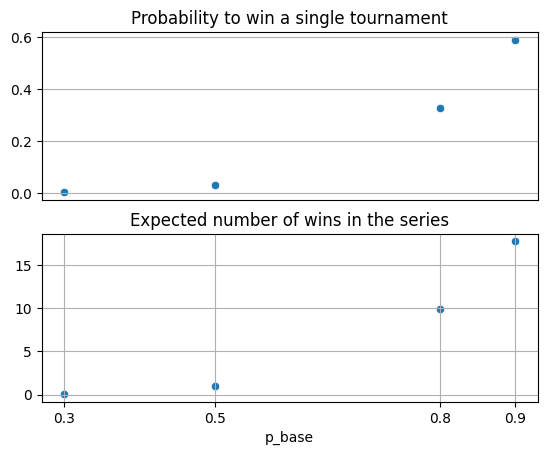

In [3]:
p_single = p_base ** math.log2(n_players)
ax1 = plt.subplot(211)
sns.scatterplot(x=p_base, y=p_single)
ax1.set_xticks([])
ax1.set_xlabel('')
plt.grid()
plt.title('Probability to win a single tournament')

expected_wins = p_single * n_games
ax2 = plt.subplot(212)
sns.scatterplot(x=p_base, y=expected_wins)
plt.grid()
ax2.set_xticks(p_base)
plt.xlabel('p_base')
plt.title('Expected number of wins in the series')

print(p_single)
print(expected_wins)

Even a high-level player has only about a 60% chance of winning a single tournament. The situation is significantly worse for players with low, medium, or even good skill levels, with respective win probabilities of approximately 0.2%, 3%, and 33%. These numbers also represent the expected fraction of tournaments won over a series

Combine everything

In [4]:
arr = []
n_wins = np.arange(0, n_games + 1)
for x in n_wins:
    p_x = math.comb(n_games, x) * (p_single ** x) * ((1 - p_single) ** (n_games - x))
    arr.append(p_x)

df = pd.DataFrame(
    data={
        'pmf': np.concat(arr),
        'cdf': np.stack(arr).cumsum(axis=0).flatten(),
        'p_base': np.tile(p_base, len(n_wins)),
        'p_single': np.tile(p_single, len(n_wins)),
        'n_wins': np.repeat(n_wins, len(p_base))
    }
)
df.head()

,pmf,cdf,p_base,p_single,n_wins
0,9.296113e-01,9.296113e-01,0.3,0.00243,0
1,3.857904e-01,3.857904e-01,0.5,0.03125,0
2,6.718633e-06,6.718633e-06,0.8,0.32768,0
3,2.333111e-12,2.333111e-12,0.9,0.59049,0
4,6.793374e-02,9.975451e-01,0.3,0.00243,1


PMF/CDF plots for the respective players

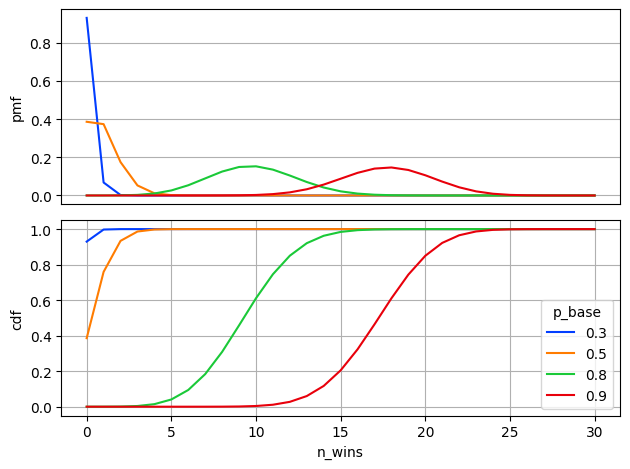

In [5]:
ax1 = plt.subplot(211)
sns.lineplot(data=df, x='n_wins', y='pmf', hue='p_base', palette='bright')
ax1.set_xticks([])
ax1.set_xlabel('')
ax1.get_legend().remove()
plt.grid()
ax2 = plt.subplot(212)
sns.lineplot(data=df, x='n_wins', y='cdf', hue='p_base', palette='bright')
plt.grid()
plt.tight_layout()

The number of attempts before a win can be modeled using a geometric distribution. Its mean equal to $1/p$

[411.52263374  32.           3.05175781   1.69350878]


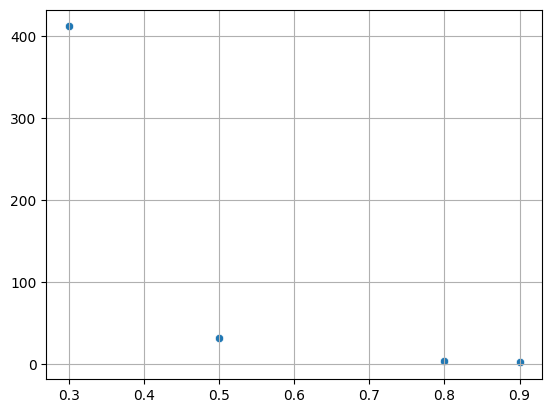

In [6]:
n_tries = 1 / p_single
print(n_tries)
sns.scatterplot(x=p_base, y=n_tries)
plt.grid()

Conclusions:
- Even high- or good-level peer-to-peer players may have to wait quite a while for their first win
- If your skill level is average or below, practice hard — the bracket system can be unforgiving!